# 随机森林和神经网络 预测 高频交易：
- 用分类算法 预测 buy or hold or sell
- 用回归算法 预测 下一个 tick 的股票价格

目录结构如下
- /single_tick
    - *.csv
- ML_prediction.py
- handcraft_policy.py

In [18]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.metrics import accuracy_score, mean_squared_error
import os
import matplotlib.pyplot as plt
import os

将single_tick目录下的 *.csv 读取，并且分成 测试集 和 训练集

In [21]:
def file_name(dir):
    for root, dirs, files in os.walk(dir):
        return files


def get_files(TICK_FOLDER):
    dir = os.path.dirname(os.path.realpath('__file__'))
    dir += '/' + TICK_FOLDER[:-1]
    files = file_name(dir)
    return files


def read_csv_to_data(TICK_FOLDER):
    # 读取csv，分成 训练集 ，测试集
    data_trains = []
    data_tests = []
    files = get_files(TICK_FOLDER)
    print('len(files)', len(files))
    # 3/4 为训练集，其余为测试集
    for i in range(len(files)):
        if i < len(files) * 3 / 4:
            data_train_temp = pd.read_csv(TICK_FOLDER + files[i])
            data_trains.append(data_train_temp)
        else:
            data_test_temp = pd.read_csv(TICK_FOLDER + files[i])
            data_tests.append(data_test_temp)
    # data = pd.concat(datas)
    data_train = pd.concat(data_trains)
    data_test = pd.concat(data_tests)
    return data_train, data_test, data_tests

In [26]:
TICK_FOLDER = 'single_tick//'
data_train, data_test, data_tests_arr = read_csv_to_data(TICK_FOLDER)
type(data_train), type(data_test), type(data_tests_arr)

len(files) 15.0


(pandas.core.frame.DataFrame, pandas.core.frame.DataFrame, list)

分类预测时构造 real 和 prediction 表格
价格预测时构造 对比图

In [32]:
def make_table(data_test, y_pred):
    # 构造 real 和 prediction 表格
    values = [0, 1, -1]
    reals = []
    index_name = []
    pred_name = []
    for real_value in values:
        data_with_real_value = data_test[data_test['buy_hold_sell'] == real_value]
        real_value_pred = pd.DataFrame({'y_pred': y_pred[data_with_real_value.index]})
        preds = []
        for pred_value in values:
            pred = real_value_pred[real_value_pred['y_pred'] == pred_value].count()[0]
            # print (pred)
            preds.append(pred)
        reals.append(preds)
        index_name.append('real is ' + str(real_value))
        pred_name.append('predction is ' + str(real_value))

    # df = pd.DataFrame({'real is '+str(values[0]):reals[0],
    #                   'real is '+str(values[1]):reals[1],
    #                   'real is '+str(values[2]):reals[2],
    #                   })
    table = pd.DataFrame(reals)
    table.index = index_name
    table.columns = pred_name
    print(table)


def plot_compare(y_pred, y_test):
    plt.plot(np.array(y_pred[0:30]), 'o', color='red', label='prediction')
    plt.plot(np.array(y_test[0:30]), 'o', color='green', label='real')
    plt.xlabel('example')
    plt.ylabel('price')
    plt.legend(loc='best')
    plt.show()

随机森林和神经网络的分类和回归实验方法：

In [31]:
def RandomForest_classifier_exp(data_train, data_test):
    print('---------------RandomForest_classifier_exp---------------')
    X_train = data_train.iloc[0:, 7:16]
    y_train = data_train['buy_hold_sell']
    X_test = data_test.iloc[0:, 7:16]
    y_test = data_test['buy_hold_sell']
    clf = RandomForestClassifier()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('accuracy_score:', accuracy_score(y_pred, y_test), '\n')
    make_table(data_test, y_pred)
    return y_pred


def RandomForest_regressor_exp(data_train, data_test):
    print('---------------RandomForest_regression_exp---------------')
    X_train = data_train.iloc[0:, 7:16]
    y_train = data_train['next_price']
    X_test = data_test.iloc[0:, 7:16]
    y_test = data_test['next_price']
    clf = RandomForestRegressor()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    plot_compare(y_pred, y_test)
    print('mean_squared_error:', mean_squared_error(y_pred, y_test), '\n')


def MlPClassifier_classifier_exp(data_train, data_test):
    print('---------------MlPClassifier_classifier_exp---------------')
    X_train = data_train.iloc[0:, 7:16]
    y_train = data_train['buy_hold_sell']
    X_test = data_test.iloc[0:, 7:16]
    y_test = data_test['buy_hold_sell']
    clf = MLPClassifier()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('accuracy_score:', accuracy_score(y_pred, y_test), '\n')
    make_table(data_test, y_pred)
    return y_pred


def MLPRegressor_regressor_exp(data_train, data_test):
    print('---------------MLPRegressor_regressor_exp---------------')
    X_train = data_train.iloc[0:, 7:16]
    y_train = data_train['next_price']
    X_test = data_test.iloc[0:, 7:16]
    y_test = data_test['next_price']
    clf = MLPRegressor(hidden_layer_sizes=3)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    plot_compare(y_pred, y_test)
    print('mean_squared_error:', mean_squared_error(y_pred, y_test), '\n')

随机森林 预测 分类：

In [33]:
RandomForest_classifier_exp(data_train, data_test)

---------------RandomForest_classifier_exp---------------
accuracy_score: 0.964142011834 

            predction is 0  predction is 1  predction is -1
real is 0            16496               0               32
real is 1              185               0                1
real is -1             185               0                1


array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
随机森林 预测 价格：
取了前30个样本显示

---------------RandomForest_regression_exp---------------


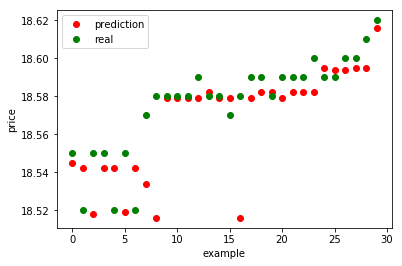

mean_squared_error: 0.00169369964497 



In [34]:
RandomForest_regressor_exp(data_train,data_test)

In [ ]:
神经网络 预测 分类：

In [35]:
MlPClassifier_classifier_exp(data_train,data_test)

---------------MlPClassifier_classifier_exp---------------
accuracy_score: 0.97798816568 

            predction is 0  predction is 1  predction is -1
real is 0            16528               0                0
real is 1              186               0                0
real is -1             186               0                0


array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
神经网络 预测 价格：

---------------MLPRegressor_regressor_exp---------------


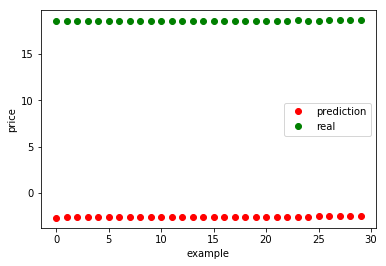

mean_squared_error: 153.596622717 



In [36]:
MLPRegressor_regressor_exp(data_train,data_test)

In [ ]:
神经网络的参数 还可以优化
除此之外：
0类样本占比太大，对 ML 而言，很难有很好的效果。